In [1]:
# Data processing libraries
import pandas as pd
import numpy as np

# Data visualization and animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import seaborn as sns

# Parameters to make more beautiful the plots
plt.rcParams.update({'mathtext.default':'regular'}) # Latex in text
sns.set(context='paper', style='whitegrid', font='Times New Roman', font_scale=1)

def colors(atom):
    if atom == 1.0:
        return 'gray'
    elif atom == 2.0:
        return 'red'
    else:
        return 'black'
    
def sizes(atom):
    if atom == 1.0:
        return 4
    elif atom == 2.0:
        return 16
    else:
        return 55

In [19]:
#with open('./dump.reax.feohB8', 'r') as fout:
#with open('./dump.reax.trial', 'r') as fout:

# Read the dump files
with open('../LAMMPS_files/dump.reax.feoh2','r') as fout:
    text_particle = fout.read() 

In [20]:
# Use the particle positions

# First, clean the data
particle_pos = text_particle.split('ITEM: TIMESTEP')[1:]
particles = [particle_pos[i].split('ITEM: ATOMS ')[1].split('\n')[1:-1] 
             for i in range(len(particle_pos))]

# Make two lists which will have the dataframes containing positions for all particles
# for each of the time
temporal_dataframes = []
iron =[]
for individual_time in particles:
    data = []
    for row in individual_time:
        data.append(row.split(' '))
    dataframe = pd.DataFrame(data, columns=['id','atom','x', 'y', 'z'], dtype=float)
    dataframe = dataframe.sort_values(by=['id'])
    dataframe = dataframe.reset_index(drop=True)
    dataframe.x = dataframe.x*(7.4+6.5)*3
    dataframe.y = dataframe.y*(6.6+8)*3
    dataframe.z = dataframe.z*(6.3+6.8)*3
    dataframe['c'] = dataframe.atom.apply(colors)
    dataframe['s'] = dataframe.atom.apply(sizes)
    dataframe2 = dataframe[dataframe.atom==3]
    temporal_dataframes.append(dataframe)
    iron.append(dataframe2)

# Check the lenght of the the frames and the number of atoms
len(temporal_dataframes),len(temporal_dataframes[0])

(1667, 4185)

<IPython.core.display.Javascript object>


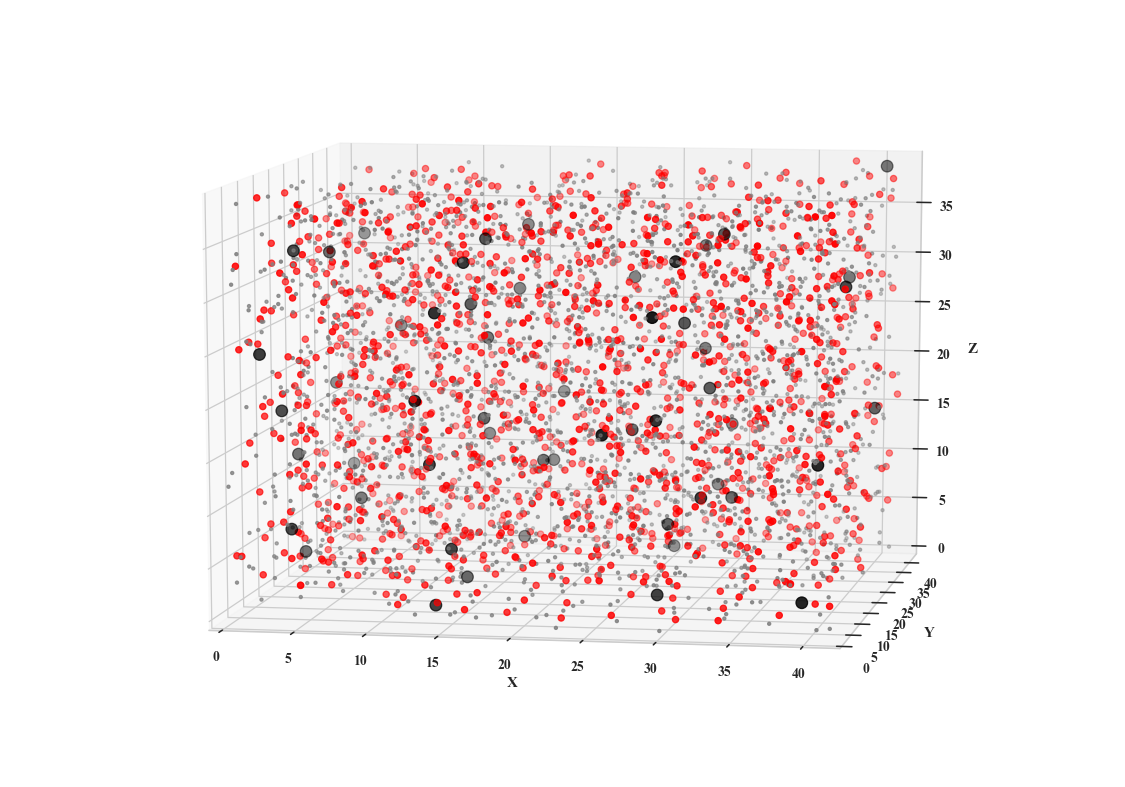

In [22]:
# Environment for plotting 
%matplotlib notebook

# Create a figure 
value = -1
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

#temporal_dataframes = iron

# 3D plot for visualization (initial conditions)
plot = ax.scatter(xs = np.array(temporal_dataframes[value].x),
               ys = np.array(temporal_dataframes[value].y),
               zs = np.array(temporal_dataframes[value].z),
               c = np.array(temporal_dataframes[value].c),
               s = np.array(temporal_dataframes[value].s))


#Set parameters
#ax.set_title(f'Particle movement at 1000K', size=18)
ax.set_xlim3d([0.0, (7.4+6.5)*3])
ax.set_xlabel('X')
ax.set_ylim3d([0.0, (6.6+8)*3])
ax.set_ylabel('Y')
ax.set_zlim3d([0.0, (6.3+6.8)*3])
ax.set_zlabel('Z')
ax.view_init(10,280)
    
plt.tight_layout()
#plt.legend(['H','O','Fe'])

# Parameter to change the speed of animation

times_mov = 1
#def animate(i):
#    plot._offsets3d = (temporal_dataframes[times_mov*i].x,
#                       temporal_dataframes[times_mov*i].y,
#                       temporal_dataframes[times_mov*i].z)
    
#ani = animation.FuncAnimation(fig, animate,interval=1,
#                              frames=int(len(temporal_dataframes)/times_mov), repeat=True)